In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

whr2015 = pd.read_csv('2015.csv')
whr2016 = pd.read_csv('2016.csv')
whr2017 = pd.read_csv('2017.csv')

In [2]:
# Next Steps:
# 1. Remove unneeded columns and add Year column
# 2. Homogenize column names
# 3. Combine data sets across years
# 4. Compare overall and regional happiness across years

In [3]:
whr2015['year'] = 2015
whr2016['year'] = 2016
whr2017['year'] = 2017

In [4]:
for df in [whr2015, whr2016, whr2017]:
    parentheses = r"[()]"
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(parentheses, '').str.replace('.', '_').str.replace('__', '_')

In [5]:
column_name_map = {'economy_gdp_per_capita_':'economy_gdp_per_capita',
                  'health_life_expectancy_': 'health_life_expectancy',
                  'trust_government_corruption_': 'trust_government_corruption'}

whr2017 = whr2017.rename(column_name_map, axis=1)

In [6]:
combined = pd.concat([whr2015, whr2016, whr2017], ignore_index=True, sort=False)

In [7]:
combined.isnull().sum()

country                          0
region                         155
happiness_rank                   0
happiness_score                  0
standard_error                 312
economy_gdp_per_capita           0
family                           0
health_life_expectancy           0
freedom                          0
trust_government_corruption      0
generosity                       0
dystopia_residual                0
year                             0
lower_confidence_interval      313
upper_confidence_interval      313
whisker_high                   315
whisker_low                    315
dtype: int64

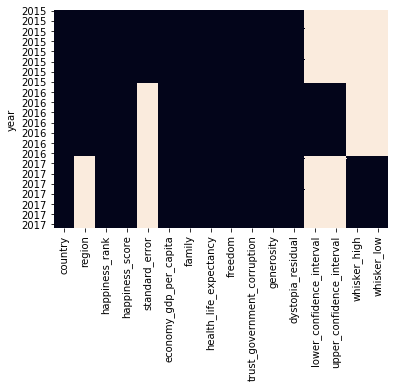

In [8]:
# Visualize missing values

combined_updated = combined.set_index('year')
sns.heatmap(combined_updated.isnull(), cbar=False)

In [9]:
# Remove columns with missing data in two years

combined.drop(['lower_confidence_interval', 'standard_error', 'upper_confidence_interval', 'whisker_high', 'whisker_low'], 
              inplace=True,
              axis=1
             )

In [10]:
combined.isnull().sum()

country                          0
region                         155
happiness_rank                   0
happiness_score                  0
economy_gdp_per_capita           0
family                           0
health_life_expectancy           0
freedom                          0
trust_government_corruption      0
generosity                       0
dystopia_residual                0
year                             0
dtype: int64

In [11]:
# Create df of countries and regions from 2015 and 2016 data sets

combined_first_two_years = combined[(combined['year'] == 2015) | (combined['year'] == 2016)][['country', 'region']]

In [12]:
# Fill in region column for 2017

combined = combined.merge(right=combined_first_two_years, how='left', on='country', suffixes=('_original', '_new'))

In [13]:
#Drop original regional column

combined.drop('region_original', axis=1, inplace=True)

In [14]:
# Rename new region column

combined.rename({'region_new':'region'}, axis=1,inplace=True)

In [15]:
# Drop duplicates created from merging

combined.drop_duplicates(inplace=True)

In [16]:
combined.loc[681,'country'] = 'Taiwan'
combined.loc[681,'region'] = 'Eastern Asia'
combined.loc[755,'country'] = 'Hong Kong'
combined.loc[755,'region'] = 'Eastern Asis'

In [17]:
combined.isnull().sum()

country                        0
happiness_rank                 0
happiness_score                0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0
year                           0
region                         0
dtype: int64